In [1]:
import pandas as pd

In [2]:
import glob
paths = glob.glob('./raw_data/*.csv')
paths

['./raw_data/apt_mst_info_202401.csv',
 './raw_data/한국교통안전공단_전국공영주차장정보_20191224.csv']

In [3]:
data = pd.read_csv(paths[0], encoding = 'euc-kr', low_memory = False)
data

,uid,apt_cd,apt_nm,rdnmadr,legaldong_cd,hshld_cost,use_aprv_year,rent_house_yn,cmpny_house_yn,rbld_yn,...,buld_stru,elcty_capa,elvtr_cnt,totprk_ecct,grnd_prk_ecct,ungr_prk_ecct,cctv_cnt,mng_office_telno,mng_office_faxno,annx_wlf_fclt
0,1,APT1111021000010428000001,낙원,서울특별시 종로구 삼일대로 428,1111013700,149.0,1968.0,0,0,0,...,철근콘크리트구조,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,APT1111021000010446005601,삼일주택,서울특별시 종로구 삼일대로 446-56,1111013700,29.0,2013.0,0,0,0,...,철근콘크리트구조,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,APT1111021000010446006601,삼성빌딩,서울특별시 종로구 삼일대로 446-66,1111013400,24.0,2013.0,0,0,0,...,철근콘크리트구조,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,APT1111021000020069000001,세종아파트,서울특별시 종로구 필운대로 69,1111011100,9.0,2005.0,0,0,0,...,철근콘크리트구조,NaN,1.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,APT1111030000080230000001,경희궁 롯데캐슬,서울특별시 종로구 통일로 230,1111018700,195.0,2019.0,0,0,0,...,철근콘크리트구조,1348.0,16.0,245.0,0.0,245.0,134.0,027324400,27324100.0,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤니티공간, 자전거보관소"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46251,46252,APT5178044900420015000001,철원철원1행복주택,강원특별자치도 철원군 금학로279번길 15,5178025021,90.0,2024.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46252,46253,APT5178048593230018000001,철원갈말행복주택,강원특별자치도 철원군 명성로111번길 18,5178025622,100.0,2021.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46253,46254,APT5179032310020020000601,화천신읍 임대주택,강원특별자치도 화천군 노신로 20-6,5179025025,20.0,2024.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46254,46255,APT5181044991430013000501,현대에코캐슬,강원특별자치도 인제군 원통로211번길 13-5,5181032021,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for i in list(data):
    print(i, data.loc[0,i])

uid 1
apt_cd APT1111021000010428000001
apt_nm 낙원
rdnmadr 서울특별시 종로구 삼일대로 428
legaldong_cd 1111013700
hshld_cost 149.0
use_aprv_year 1968.0
rent_house_yn 0
cmpny_house_yn 0
rbld_yn 0
lo 126.9880526332
la 37.5727478117
hsmp_type nan
lnno_adres 서울특별시 종로구 낙원동 288번지
ltout_type 분양
dngct 1.0
heat_mthd 개별난방, 도시가스
crrdpr_type 복도식
cnst_entrprs_nm nan
house_mng_entrprs_nm nan
buld_stru 철근콘크리트구조
elcty_capa nan
elvtr_cnt 0.0
totprk_ecct 0.0
grnd_prk_ecct nan
ungr_prk_ecct nan
cctv_cnt nan
mng_office_telno nan
mng_office_faxno nan
annx_wlf_fclt nan


In [5]:
조건1 = data['lnno_adres'].str.split(pat = ' ', expand = True)[1] == '서초구'
조건2 = data['lnno_adres'].str.split(pat = ' ', expand = True)[1] == '강남구'
조건3 = data['lnno_adres'].str.split(pat = ' ', expand = True)[1] == '송파구'
강남3구아파트 = data.loc[조건1|조건2|조건3, ['apt_nm', 'apt_cd', 'legaldong_cd', 'lo', 'la', 'lnno_adres']]
강남3구아파트['dong'] = 강남3구아파트['lnno_adres'].str.split(pat = ' ', expand = True)[2]
강남3구_법정동코드 = 강남3구아파트['legaldong_cd'].unique()
강남3구아파트

,apt_nm,apt_cd,legaldong_cd,lo,la,lnno_adres,dong
7051,방배래미안타워,APT1165020000032183000001,1165010100,126.991302,37.474816,서울특별시 서초구 방배동 485-3 방배래미안타워,방배동
7052,대우로얄빌라트(1027-1),APT1165020000032271001101,1165010100,126.999869,37.475016,서울특별시 서초구 방배동 1027-1번지,방배동
7053,래미안방배아트힐,APT1165020000032311001201,1165010100,127.005121,37.477674,서울특별시 서초구 방배동 1008-2 래미안방배아트힐,방배동
7055,서초3차e편한세상,APT1165020000032343001001,1165010800,127.007745,37.478649,서울특별시 서초구 서초동 1467-37 서초3차e편한세상,서초동
7057,한솔로이젠트,APT1165020000032614000001,1165010200,127.036687,37.484444,서울특별시 서초구 양재동 11-17번지,양재동
...,...,...,...,...,...,...,...
9047,더샵스타파크,APT1171041695510010000001,1171010200,127.102633,37.516940,서울특별시 송파구 신천동 7-14 잠실더샵스타파크,신천동
9048,한신코아,APT1171041695510011000001,1171010200,127.104166,37.516302,서울특별시 송파구 신천동 11-9 한신코아,신천동
9049,더샵스타리버,APT1171041695540093000001,1171010200,127.104393,37.517773,서울특별시 송파구 신천동 11-8 포스코더샵스타리버,신천동
9050,장미3,APT1171041695540094000001,1171010200,127.103610,37.518486,서울특별시 송파구 신천동 11 신천장미1차2차,신천동


In [6]:
강남3구아파트['dong'].value_counts()

dong
방배동     259
서초동     220
반포동     113
역삼동     108
삼성동     100
청담동      99
가락동      84
양재동      79
도곡동      72
논현동      70
방이동      68
대치동      65
잠원동      64
오금동      46
문정동      45
개포동      39
신사동      34
송파동      34
거여동      29
풍납동      29
마천동      28
압구정동     23
장지동      23
석촌동      23
우면동      17
일원동      16
잠실동      15
신천동      11
삼전동      11
수서동      10
자곡동       7
세곡동       7
신원동       5
율현동       2
내곡동       2
Name: count, dtype: int64

In [7]:
강남3구_법정동코드

array([1165010100, 1165010800, 1165010200, 1165010700, 1165010600,
       1165010300, 1165011100, 1165010900, 1168011800, 1168010300,
       1168010100, 1168010800, 1168010400, 1168011400, 1168010600,
       1168010500, 1168011000, 1168011100, 1168011200, 1168010700,
       1168011500, 1168011300, 1171011100, 1171010800, 1171010700,
       1171010200, 1171010100, 1171011200, 1171010900, 1171010400,
       1171011300, 1171011400, 1171010500, 1171010600, 1171010300])

In [8]:
강남3구아파트['lnno_adres'].str.split(pat = ' ', expand = True)[2].dropna()

7051    방배동
7052    방배동
7053    방배동
7055    서초동
7057    양재동
       ... 
9047    신천동
9048    신천동
9049    신천동
9050    신천동
9053    거여동
Name: 2, Length: 1857, dtype: object

20세이상~24세이하	in_age_005  
  
25세이상~29세이하	in_age_006  
  
30세이상~34세이하	in_age_007  
  
35세이상~39세이하	in_age_008  
  
40세이상~44세이하	in_age_009  
  
45세이상~49세이하	in_age_010  

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
num_구s = ['11220', '11230', '11240']
data_frontiers = []
data_frontier = pd.DataFrame()
data_인구 = pd.DataFrame()
# pd.read_table('./raw_data/stat/11220_2022년_성연령별인구.txt', sep = '^', header = None)
for num_구 in num_구s:
    data_frontiers.append(gpd.read_file('./raw_data/frontier'+num_구+'/bnd_oa_'+num_구+'_2023_2023_2Q.shp'))
    data_frontiers[-1]['gu'] = str(num_구)
    data_frontier = pd.concat([data_frontier, data_frontiers[-1][['gu', 'TOT_REG_CD', 'geometry']]]).reset_index(drop = True)

    data_인구 = pd.concat([data_인구, pd.read_table('./raw_data/stat/'+num_구+'_2022년_성연령별인구.txt', sep = '^', header = None, names = ['year', 'TOT_REG_CD', 'sex_age_code', 'count'])]).reset_index(drop = True)
data_인구 = data_인구.loc[(data_인구['sex_age_code'] == 'in_age_006')|(data_인구['sex_age_code'] == 'in_age_007')|(data_인구['sex_age_code'] == 'in_age_008'), :]
data_인구 = data_인구.groupby('TOT_REG_CD').agg({'count': 'sum'}).reset_index()
data_인구['TOT_REG_CD'] = data_인구['TOT_REG_CD'].astype(str)
종합데이터 = data_frontier.merge(data_인구, how = 'left', on = 'TOT_REG_CD')
종합데이터['centroid'] = 종합데이터['geometry'].centroid
종합데이터['centroid'] = 종합데이터['centroid'].to_crs(epsg=4326)
종합데이터['geometry'] = 종합데이터['geometry'].to_crs(epsg=4326)

data_frontiers[-1]


ERROR 1: PROJ: proj_create_from_database: Open of /home/yspark/miniconda3/envs/env_tg_db/share/proj failed


,BASE_DATE,ADM_CD,TOT_REG_CD,geometry,gu
0,20230701,11240660,11240660010230,"POLYGON ((964984.492 1944117.325, 964946.351 1...",11240
1,20230701,11240810,11240810010003,"POLYGON ((967868.426 1943295.028, 967860.317 1...",11240
2,20230701,11240660,11240660010218,"POLYGON ((964937.739 1944183.311, 964917.646 1...",11240
3,20230701,11240750,11240750010127,"POLYGON ((965592.929 1946983.965, 965524.664 1...",11240
4,20230701,11240660,11240660010226,"POLYGON ((965042.122 1944073.546, 964986.503 1...",11240
...,...,...,...,...,...
1269,20230701,11240540,11240540010801,"POLYGON ((968610.750 1943436.935, 968584.019 1...",11240
1270,20230701,11240590,11240590030105,"POLYGON ((968488.162 1946495.177, 968501.177 1...",11240
1271,20230701,11240590,11240590040102,"POLYGON ((967803.838 1946270.323, 967783.194 1...",11240
1272,20230701,11240820,11240820010202,"POLYGON ((968209.343 1942751.619, 968188.172 1...",11240


810901

<Axes: >

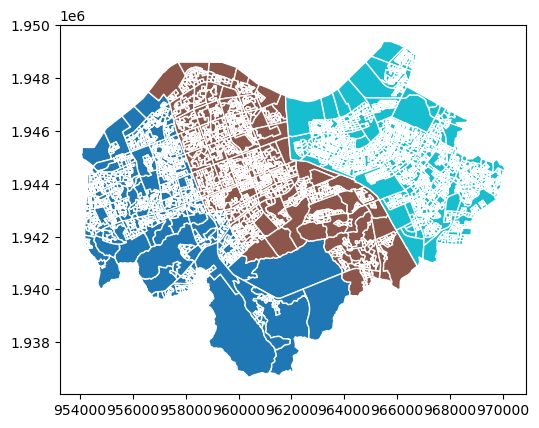

In [10]:
data_frontier.plot(column = 'gu'
                    , categorical = True
                    , edgecolor = 'white'
                   )

<Axes: >

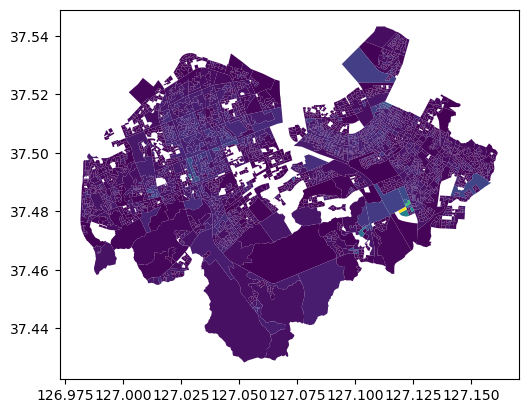

In [19]:
종합데이터 = 종합데이터[(종합데이터['count']>0)]
종합데이터.plot(column = 'count'
                # , edgecolor = 'white'
          )

In [12]:
종합데이터.describe()

,count
count,3017.000000
mean,109.051376
std,71.930990
min,0.000000
25%,66.000000
50%,91.000000
75%,138.000000
max,1602.000000


<Axes: >

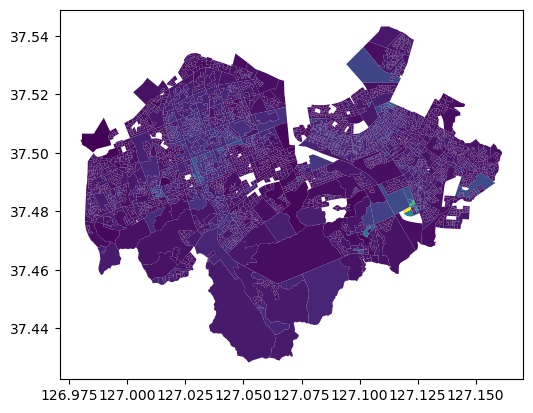

In [13]:
종합데이터[(종합데이터['count']>0)].plot(column = 'count'
                # , edgecolor = 'white'
          )

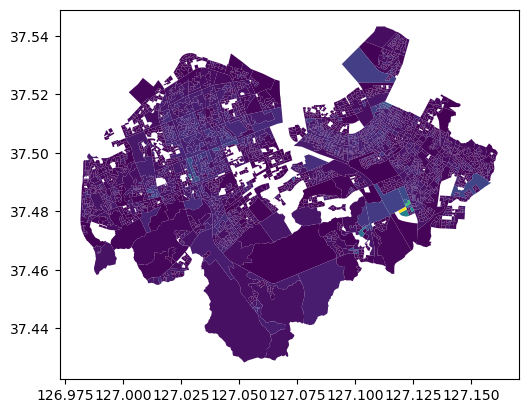

,count
count,2704.000000
mean,117.150148
std,71.603460
min,51.000000
25%,73.000000
50%,98.000000
75%,144.000000
max,1602.000000


In [15]:
종합데이터_처리 = 종합데이터[(종합데이터['count']>50)]
종합데이터_처리.plot(column = 'count'
                # , edgecolor = 'white'
          )
plt.show()
종합데이터_처리.describe()

In [163]:
종합데이터_처리

,gu,TOT_REG_CD,geometry,count,centroid
0,11220,11220520010107,"POLYGON ((127.02654 37.48948, 127.02601 37.489...",142.0,POINT (127.02621 37.48978)
1,11220,11220590020102,"POLYGON ((127.00201 37.50790, 127.00223 37.507...",145.0,POINT (127.00173 37.50763)
2,11220,11220670020002,"POLYGON ((127.03551 37.46515, 127.03539 37.464...",183.0,POINT (127.04780 37.44425)
3,11220,11220680030001,"POLYGON ((127.07618 37.45624, 127.07639 37.456...",224.0,POINT (127.06819 37.44481)
4,11220,11220540010106,"POLYGON ((127.02177 37.50081, 127.02166 37.500...",159.0,POINT (127.02117 37.50097)
...,...,...,...,...,...
3067,11240,11240540010801,"POLYGON ((127.14493 37.48965, 127.14463 37.488...",272.0,POINT (127.14401 37.48973)
3068,11240,11240590030105,"POLYGON ((127.14341 37.51721, 127.14356 37.517...",138.0,POINT (127.14088 37.51645)
3069,11240,11240590040102,"POLYGON ((127.13568 37.51516, 127.13544 37.514...",137.0,POINT (127.13466 37.51537)
3070,11240,11240820010202,"POLYGON ((127.14042 37.48346, 127.14018 37.482...",150.0,POINT (127.13148 37.47358)


In [20]:
import pickle

# save
with open('./data/강남3구_집계구_경계_중심.pickle', 'wb') as f:
    pickle.dump(종합데이터, f, pickle.HIGHEST_PROTOCOL)

In [173]:
import pickle

# save
with open('./data/강남3구_집계구_경계_중심_처리.pickle', 'wb') as f:
    pickle.dump(종합데이터_처리, f, pickle.HIGHEST_PROTOCOL)

예약가능시간 : <br>
휴일: 10, 12, 14, 16, 18, 20시
<br>
업무일: 9, 12, 15, 18, 20시
<br>

강남3구 전체에서 하루 평균 (시간별 평균) (시간별표준편차): <br>
휴일 하루 예약 평균 120 (20, 20, 20, 20, 20) (4, 4, 4, 4, 4)<br>
업무일 하루 예약 평균 55 (5, 5, 5, 20, 20) (1, 1, 1, 4, 4)<br>
접속: 랜덤시간 <br>
접속 -> 예약 전환률 : 0.2 <br>

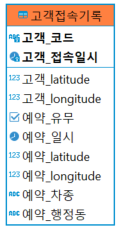

In [ ]:
asdgs

<Axes: >

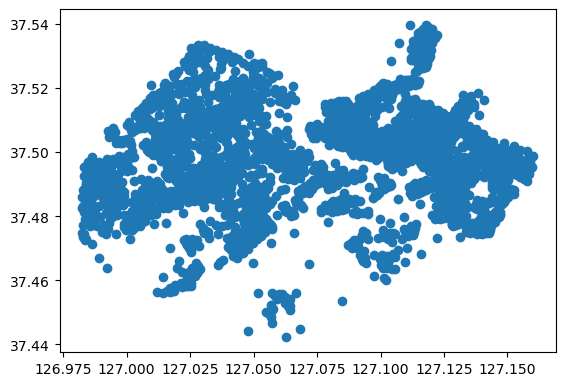

In [22]:
종합데이터['centroid'].plot()

In [171]:
종합데이터_처리['centroid'].iloc[0].y

37.489781420851536

In [164]:
data_frontier['geometry'].centroid

0       POINT (958115.413 1943498.047)
1       POINT (955962.079 1945489.204)
2       POINT (960000.001 1938436.788)
3       POINT (961804.056 1938490.878)
4       POINT (957676.217 1944741.804)
                     ...              
3067    POINT (968529.455 1943446.887)
3068    POINT (968264.223 1946411.793)
3069    POINT (967713.985 1946294.234)
3070    POINT (967414.750 1941659.349)
3071    POINT (966112.561 1948118.257)
Length: 3072, dtype: geometry

In [81]:
data_인구[3].describe()

count    3017.000000
mean      217.649321
std        86.882835
min         0.000000
25%       167.000000
50%       206.000000
75%       252.000000
max      2139.000000
Name: 3, dtype: float64

In [72]:
data_인구

,0,1,2,3
0,2022,11220510020004,in_age_007,16.0
1,2022,11220510011201,in_age_004,22.0
2,2022,11220540010105,in_age_009,51.0
3,2022,11220670010025,in_age_017,7.0
4,2022,11220570030104,in_age_004,13.0
...,...,...,...,...
166463,2022,11240640020001,in_age_070,18.0
166464,2022,11240660010226,in_age_061,6.0
166465,2022,11240640020027,in_age_076,NaN
166466,2022,11240570010006,in_age_061,8.0


<Axes: >

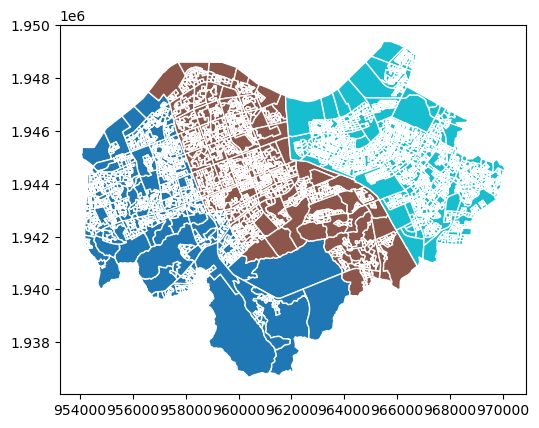

In [70]:
a = data_frontiers[0].loc[:, ['geometry']]
a['gu'] = 'seocho'


<Axes: >

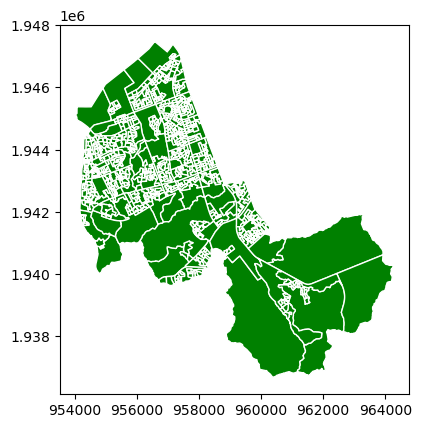

In [49]:
data_frontiers[0]['geometry'].plot(color = 'green', edgecolor = 'white')

<Figure size 640x480 with 0 Axes>

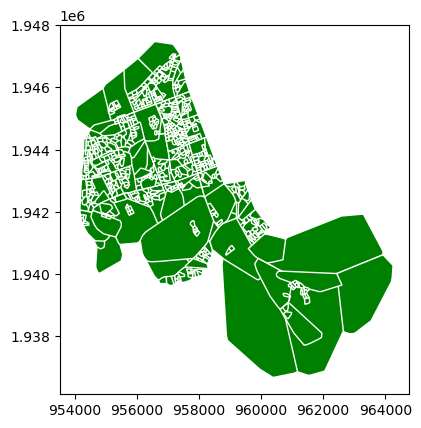

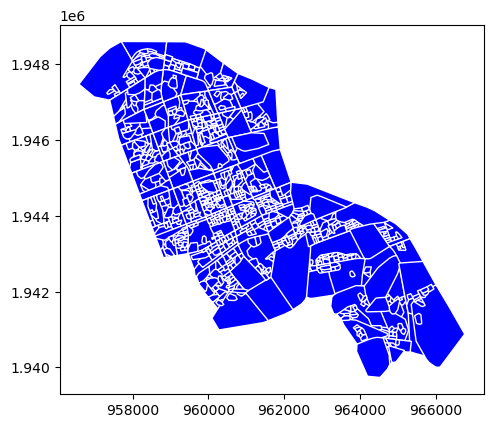

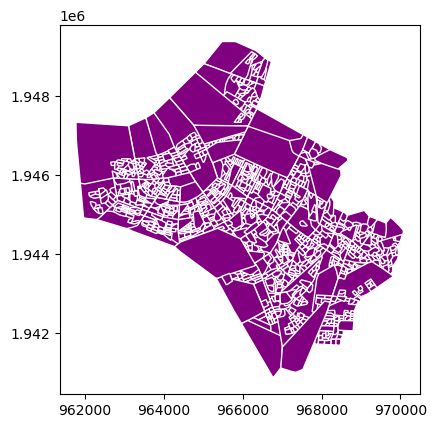

In [8]:
plt.figure()
data_frontiers[0].convex_hull.plot(color = 'green', edgecolor = 'white')
data_frontiers[1].convex_hull.plot(color = 'blue', edgecolor = 'white')
data_frontiers[2].convex_hull.plot(color = 'purple', edgecolor = 'white')
plt.show()

In [9]:
data_frontiers[0].convex_hull

0      POLYGON ((958097.811 1943448.756, 958072.502 1...
1      POLYGON ((955943.501 1945442.584, 955917.420 1...
2      POLYGON ((960392.028 1936665.548, 960378.324 1...
3      POLYGON ((961574.145 1936736.330, 961520.355 1...
4      POLYGON ((957646.842 1944693.116, 957621.576 1...
                             ...                        
778    POLYGON ((956872.417 1944799.227, 956804.705 1...
779    POLYGON ((957089.907 1946278.861, 957062.309 1...
780    POLYGON ((958242.785 1940174.646, 957574.449 1...
781    POLYGON ((956601.755 1945456.625, 956599.792 1...
782    POLYGON ((956439.056 1945841.231, 956421.058 1...
Length: 783, dtype: geometry

In [10]:
data_frontiers[0]

,BASE_DATE,ADM_CD,TOT_REG_CD,geometry
0,20230701,11220520,11220520010107,"POLYGON ((958144.709 1943464.008, 958097.811 1..."
1,20230701,11220590,11220590020102,"POLYGON ((955987.242 1945519.450, 956006.291 1..."
2,20230701,11220670,11220670020002,"POLYGON ((958924.257 1940760.901, 958913.476 1..."
3,20230701,11220680,11220680030001,"POLYGON ((962516.841 1939756.176, 962535.121 1..."
4,20230701,11220540,11220540010106,"POLYGON ((957729.638 1944723.990, 957719.823 1..."
...,...,...,...,...
778,20230701,11220570,11220570030402,"POLYGON ((957023.452 1944925.989, 956986.828 1..."
779,20230701,11220550,11220550021801,"POLYGON ((957185.796 1946334.575, 957176.766 1..."
780,20230701,11220660,11220660040201,"POLYGON ((957888.321 1940428.045, 957905.643 1..."
781,20230701,11220590,11220590010504,"POLYGON ((956601.872 1945456.669, 956601.755 1..."


20세이상~24세이하	in_age_005  
  
25세이상~29세이하	in_age_006  
  
30세이상~34세이하	in_age_007  
  
35세이상~39세이하	in_age_008  
  
40세이상~44세이하	in_age_009  
  
45세이상~49세이하	in_age_010  

In [67]:
import pandas as pd
pd.read_table('./raw_data/stat/11220_2022년_성연령별인구.txt', sep = '^', header = None)

,0,1,2,3
0,2022,11220510020004,in_age_007,16.0
1,2022,11220510011201,in_age_004,22.0
2,2022,11220540010105,in_age_009,51.0
3,2022,11220670010025,in_age_017,7.0
4,2022,11220570030104,in_age_004,13.0
...,...,...,...,...
42726,2022,11220670010029,in_age_068,15.0
42727,2022,11220610011301,in_age_066,14.0
42728,2022,11220530030007,in_age_071,6.0
42729,2022,11220660020002,in_age_078,NaN


In [65]:
pd.read_table('./raw_data/stat/11220_2022년_인구총괄(총인구).txt', sep = '^', header = None)

,0,1,2,3
0,2022,11220510010001,to_in_001,491
1,2022,11220510010014,to_in_001,401
2,2022,11220510010014,to_in_008,193
3,2022,11220510010015,to_in_001,496
4,2022,11220510010015,to_in_008,261
...,...,...,...,...
2320,2022,11220510010012,to_in_007,268
2321,2022,11220510010013,to_in_008,211
2322,2022,11220510010013,to_in_001,442
2323,2022,11220510010013,to_in_007,231
